</p>

# Movie Data Correlations with Python

The movie data used in this project was hosted on <a href="https://www.kaggle.com/datasets/danielgrijalvas/movies">KAGGLE</a>, where the data was scraped from IMBD. The aim of this project is to determine the correlations between the attributes of each movie, which includes:

*   name: name of the movie
*   rating: rating of the movie (R, PG, etc.)
*   genre: main genre of the movie.
*   year: year of release
*   released: release date (YYYY-MM-DD) & release country
*   score: IMDb user rating
*   votes: number of user votes
*   director: director of the movie
*   writer: writer of the movie
*   star: main actor/actress
*   country: country of origin
*   budget: the budget of the movie
*   gross: revenue of the movie
*   company: the production company
*   runtime: duration of the movie

<h2 id="import_data">Import Libararies</h2>

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #allow chained assignments to be performed without raising a warning
#pd.set_option('display.max_rows', None) #to display the complete database

Load the data and store it in dataframe `df`:

In [2]:
# Read in the data

df = pd.read_csv(r'C:\Users\\Muham\Downloads\movies.csv')

In [3]:
# Let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<h2 id="import_data">Data Cleaning</h2>

In [4]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    missing_data = df[col].isnull().sum()
    #missing_data = np.sum(df[col].isnull())
    print('{} - {}'.format(col, missing_data))
    
#in form of percentage
#for col in df.columns:
    #pct_missing = np.mean(df[col].isnull())
    #print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [5]:
# Remove the missing data from budget/gross column as it is not possbile to determine the values without introducing bias

df.dropna(subset=['budget', 'gross'], inplace=True)

In [6]:
# Reset the index

df.reset_index(drop=True, inplace=True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
5432,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
5433,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
5434,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [7]:
# Check data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Remove unnecessary zeros after decimal

df[['budget', 'gross']] = df[['budget', 'gross']].astype('int64')
#inplace parameter only works when modifying a single column or a subset of columns

In [9]:
# Drop duplicates if any

duplicates = df.duplicated().value_counts()
duplicates
#df.drop_duplicates() #drop duplicates from the whole database

#df['name'].drop_duplicates().sort_values(ascending=False)

False    5436
dtype: int64

<h2 id="import_data">Data Visulization through Sorting/Grouping and Basic Plots</h2>

In [10]:
# Order our Data a little bit to see

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3743,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
5316,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
1802,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
4743,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
5172,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
2295,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
154,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
1379,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [11]:
# Looking at the top 15 production compaies by gross revenue

CompanyGrossSum = df.groupby('company')[['gross']].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted

,gross
company,
Warner Bros.,54773202654
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19628786232
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [12]:
# Looking at the top 15 movies and their correpsonding production company by gross revenue

CompanyMovieGrossSum = df.groupby(['name', 'company'])[['gross']].sum()
CompanyMovieGrossSumSorted = CompanyMovieGrossSum.sort_values('gross', ascending = False)[:15]
CompanyMovieGrossSumSorted

,,gross
name,company,
Avatar,Twentieth Century Fox,2847246203
Avengers: Endgame,Marvel Studios,2797501328
The Lion King,Walt Disney Pictures,2754448457
Titanic,Twentieth Century Fox,2201647264
Star Wars: Episode VII - The Force Awakens,Lucasfilm,2069521700
Avengers: Infinity War,Marvel Studios,2048359754
Jurassic World,Universal Pictures,1670516444
Aladdin,Walt Disney Pictures,1554744172
The Avengers,Marvel Studios,1518815515


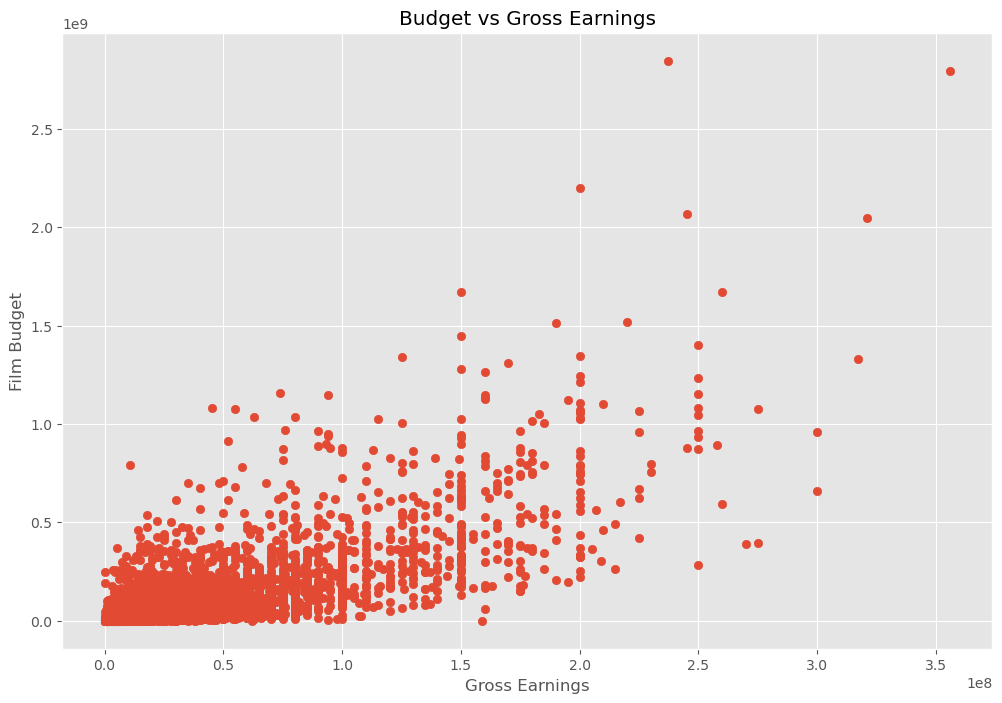

In [13]:
# Scatter plot between budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show()

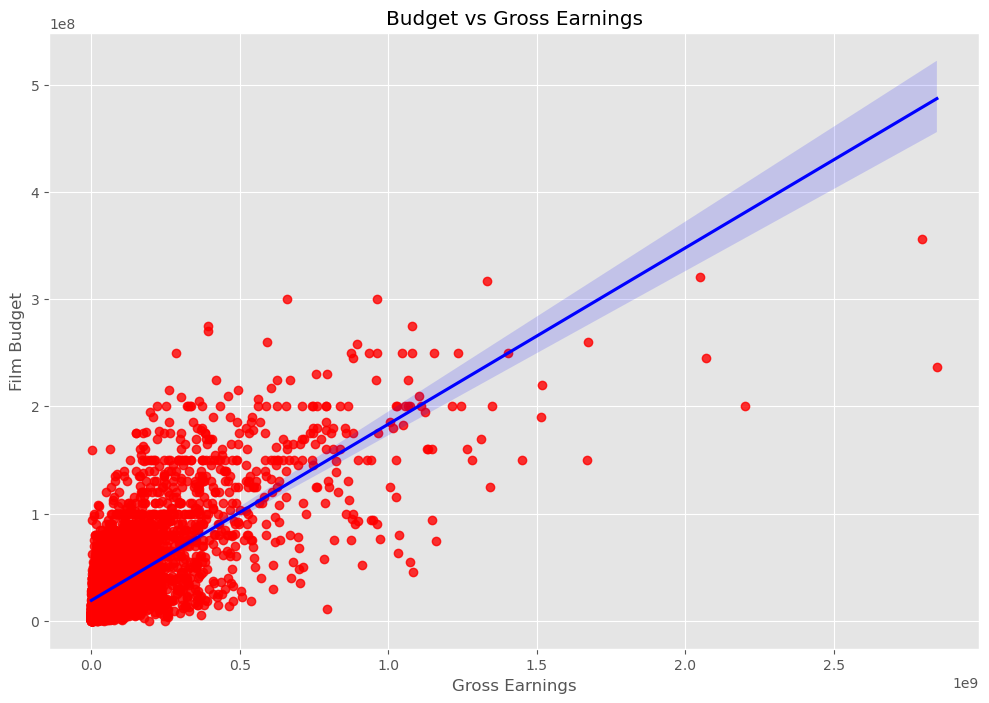

In [14]:
# Plot budget vs gross using seaborn

sns.regplot(x='gross', y='budget', data=df,
           scatter_kws={'color':'red'}, line_kws={'color':'blue'})

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show()

<h2 id="import_data">Correlations using Different Methods</h2>

In [15]:
# Determine correlation values using different methods

#1 Pearson
df.corr() #pearson by deafult

C:\Users\Muham\AppData\Local\Temp\ipykernel_15364\1014600664.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #pearson by deafult


,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [16]:
#2 Kendall
df.corr(method ='kendall')

C:\Users\Muham\AppData\Local\Temp\ipykernel_15364\3781307609.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.038391,0.295884,0.220991,0.239313,0.064106
score,0.038391,1.000000,0.350111,-0.006518,0.124715,0.292872
votes,0.295884,0.350111,1.000000,0.346228,0.553640,0.205616
budget,0.220991,-0.006518,0.346228,1.000000,0.512637,0.230879
gross,0.239313,0.124715,0.553640,0.512637,1.000000,0.176825
runtime,0.064106,0.292872,0.205616,0.230879,0.176825,1.000000


In [17]:
#3 Spearman
df.corr(method ='spearman')

C:\Users\Muham\AppData\Local\Temp\ipykernel_15364\1684135515.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='spearman')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056269,0.426571,0.313199,0.350679,0.094396
score,0.056269,1.000000,0.495379,-0.010133,0.182857,0.413040
votes,0.426571,0.495379,1.000000,0.493404,0.745815,0.300959
budget,0.313199,-0.010133,0.493404,1.000000,0.693670,0.330276
gross,0.350679,0.182857,0.745815,0.693670,1.000000,0.257121
runtime,0.094396,0.413040,0.300959,0.330276,0.257121,1.000000


C:\Users\Muham\AppData\Local\Temp\ipykernel_15364\1469928013.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


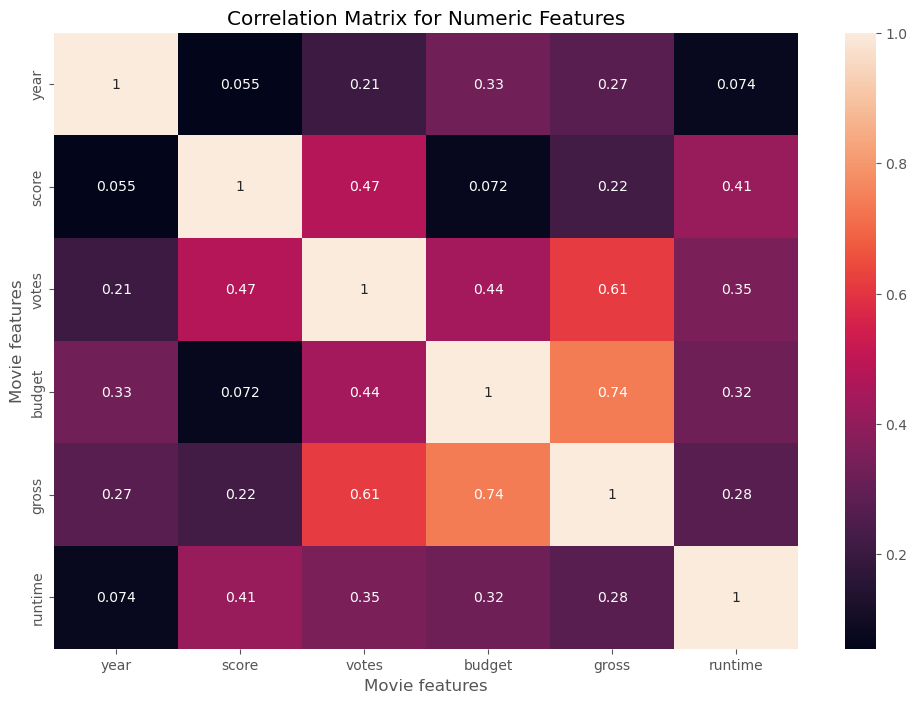

In [18]:
# Correlation Matrix between all numeric columns

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

<h2 id="import_data">Correlations Between Numerical & Categorical Variables</h2>

In [19]:
# Determine correlation w.r.t non-numeric values

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439


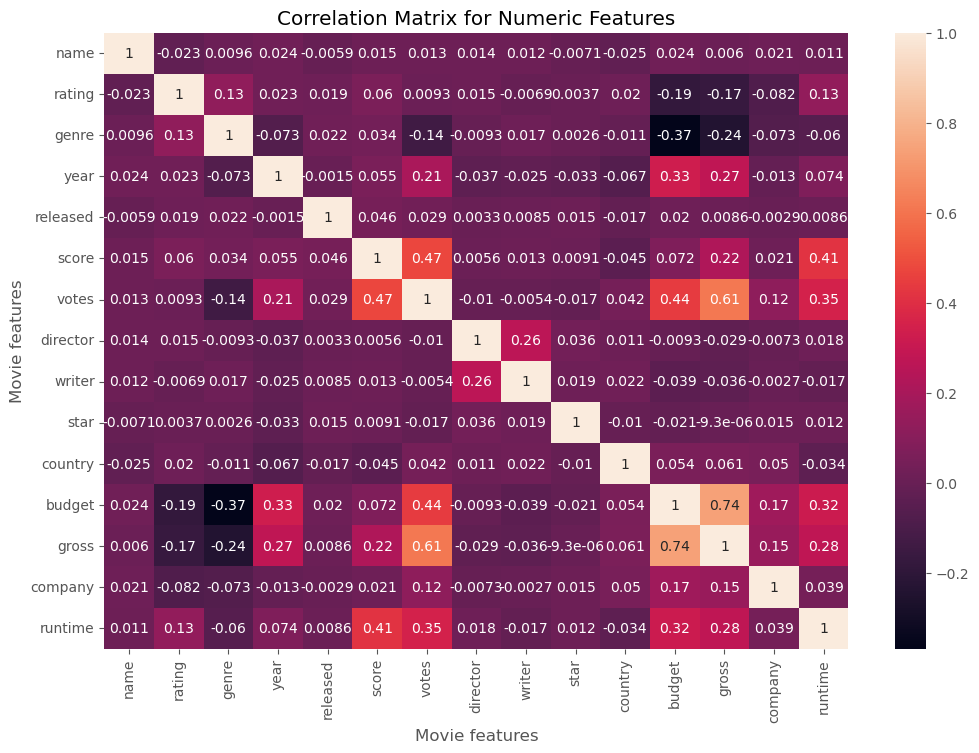

In [20]:
# Correlation Matrix between old & new numerized columns

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [21]:
# Unstacked the correlation matrix for better visualization

corr_pairs = correlation_matrix.unstack()
corr_pairs.to_frame()

0
name    name      1.000000
        rating   -0.023013
        genre     0.009617
        year      0.024435
        released -0.005896
...                    ...
runtime country  -0.033554
        budget    0.318595
        gross     0.275596
        company   0.038752
        runtime   1.000000

[225 rows x 1 columns]

In [22]:
# Sort the correlation pairs

sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs.to_frame()

,,0
genre,budget,-0.368900
budget,genre,-0.368900
genre,gross,-0.244380
gross,genre,-0.244380
rating,budget,-0.186892
...,...,...
year,year,1.000000
genre,genre,1.000000
rating,rating,1.000000
company,company,1.000000


In [23]:
# Take a look at the ones that have a strong correlation (> 0.5)

strong_pairs = sorted_pairs[(sorted_pairs) > 0.5]
strong_pairs.to_frame()

,,0
gross,votes,0.614904
votes,gross,0.614904
budget,gross,0.740395
gross,budget,0.740395
name,name,1.000000
director,director,1.000000
gross,gross,1.000000
budget,budget,1.000000
country,country,1.000000
star,star,1.000000


<h3>Conclusion:</h3>

<p>Unsurprisingly, gross earnings are strongly correlated with budget, whereas large production companies have a weaker correlation with gross earnings. Votes and budgets, on the other hand, have the highest correlation to gross earnings.

<h2 id="import_data">Alternatively: Use Factorization</h2>

In [24]:
#this assigns a random numeric value for each unique categorical value

df_numerized = df.apply(lambda x: x.factorize()[0])
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.315672,0.186218,0.266196,0.667802,0.136704,0.608592,0.680281,0.763528,0.601284,0.127050,0.528419,0.986490,0.633131,0.088441
rating,0.315672,1.000000,0.031313,0.094905,0.240717,-0.075083,0.120264,0.229371,0.251854,0.233282,0.118063,0.289557,0.320653,0.274060,0.029698
genre,0.186218,0.031313,1.000000,0.074748,0.113826,0.049020,0.177988,0.132293,0.129560,0.143856,-0.053820,0.173006,0.184644,0.080321,0.011899
year,0.266196,0.094905,0.074748,1.000000,0.358793,0.044128,0.285813,0.185075,0.229739,0.239222,-0.049184,0.189760,0.276600,0.136084,0.037832
released,0.667802,0.240717,0.113826,0.358793,1.000000,0.098692,0.481932,0.479288,0.541143,0.440012,0.094092,0.399125,0.677864,0.410561,0.056642
score,0.136704,-0.075083,0.049020,0.044128,0.098692,1.000000,0.248673,0.176878,0.122700,0.139014,-0.056188,-0.006683,0.140060,0.023278,0.056801
votes,0.608592,0.120264,0.177988,0.285813,0.481932,0.248673,1.000000,0.473699,0.523163,0.429642,0.016532,0.318387,0.620593,0.347598,0.087665
director,0.680281,0.229371,0.132293,0.185075,0.479288,0.176878,0.473699,1.000000,0.643213,0.506157,0.125524,0.444053,0.693318,0.529079,0.084415
writer,0.763528,0.251854,0.129560,0.229739,0.541143,0.122700,0.523163,0.643213,1.000000,0.510510,0.140827,0.449116,0.775945,0.532259,0.066497
star,0.601284,0.233282,0.143856,0.239222,0.440012,0.139014,0.429642,0.506157,0.510510,1.000000,0.111605,0.460511,0.613920,0.458270,0.095749


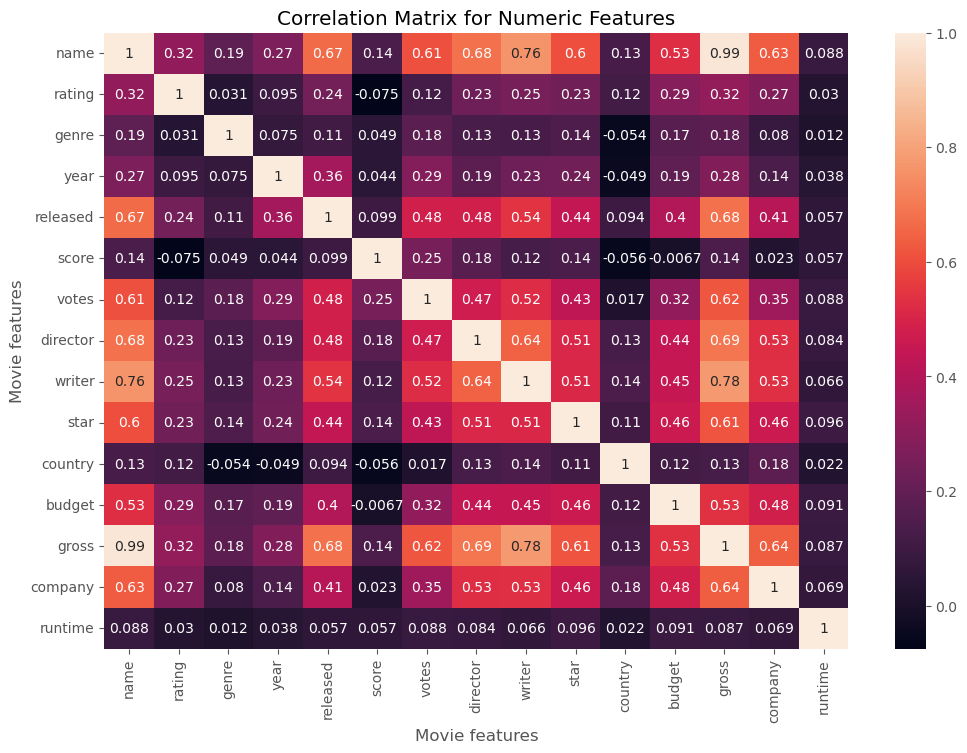

In [25]:
# Create a correlation matrix 

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

<p>Factorization shows a high correlation between gross earnings and budget, production company, writer, director as well as votes/star. This is contrary to the results depicted earlier, because factorization is not suitable for numeric values. While the lambda fuction factorized the whole dataset including numeric and non-numeric value. Factorization is typically used to encode categorical variables as integers, whereas numeric variables should generally be left as is. Using factorized values for numeric variables can lead to inaccurate results, as the integer values may not accurately reflect the magnitude or ordering of the original values. In addition, using factorized values for numeric variables may mask any non-linear relationships between the variables.